## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [151]:
df = pd.read_fwf("brain_body.txt")

# Data Cleaning

In [152]:
df.shape

(62, 2)

In [153]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [154]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [155]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [156]:
df=df.drop_duplicates()
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [157]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [158]:
iqr = df.Brain.quantile(0.75)-df.Brain.quantile(0.25)
upper_threshold= df.Brain.quantile(0.75)+(1.5*iqr)
lower_threshold= df.Brain.quantile(0.25)-(1.5*iqr)
upper_threshold,lower_threshold

(119.60625, -70.80375000000001)

In [159]:
df.Brain=df.Brain.clip(-70.8,119.6)
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,119.600,423.0
4,36.330,119.5
...,...,...
57,119.600,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [160]:
iqr = df.Body.quantile(0.75)-df.Body.quantile(0.25)
upper_threshold= df.Body.quantile(0.75)+(1.5*iqr)
lower_threshold= df.Body.quantile(0.25)-(1.5*iqr)
upper_threshold,lower_threshold

(408.625, -238.375)

In [161]:
df.Body=df.Body.clip(-238.3,408.6)
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,119.600,408.6
4,36.330,119.5
...,...,...
57,119.600,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [162]:
df.shape

(62, 2)

# EDA

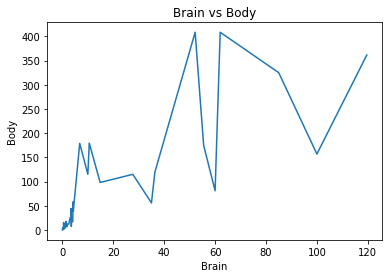

In [163]:
df.groupby('Brain')['Body'].mean().plot()
#df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [164]:
df.corr()

,Brain,Body
Brain,1.000000,0.888244
Body,0.888244,1.000000


1) Is there any relationship between the feature and target - Yes
2) Is there any linear relationship between the feature and target - Yes
3) No transformation is required

# Preparing the Data

In [165]:
df.Brain.values

array([3.385e+00, 4.800e-01, 1.350e+00, 1.196e+02, 3.633e+01, 2.766e+01,
       1.483e+01, 1.040e+00, 4.190e+00, 4.250e-01, 1.010e-01, 9.200e-01,
       1.000e+00, 5.000e-03, 6.000e-02, 3.500e+00, 2.000e+00, 1.700e+00,
       1.196e+02, 2.300e-02, 1.196e+02, 1.196e+02, 7.850e-01, 1.000e+01,
       3.300e+00, 2.000e-01, 1.410e+00, 1.196e+02, 1.196e+02, 8.500e+01,
       7.500e-01, 6.200e+01, 1.196e+02, 3.500e+00, 6.800e+00, 3.500e+01,
       4.050e+00, 1.200e-01, 2.300e-02, 1.000e-02, 1.400e+00, 1.196e+02,
       2.500e+00, 5.550e+01, 1.000e+02, 5.216e+01, 1.055e+01, 5.500e-01,
       6.000e+01, 3.600e+00, 4.288e+00, 2.800e-01, 7.500e-02, 1.220e-01,
       4.800e-02, 1.196e+02, 3.000e+00, 1.196e+02, 9.000e-01, 1.620e+00,
       1.040e-01, 4.235e+00])

In [166]:
X = df.loc[:, ['Brain']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Body'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 5789)

In [167]:
X_train.shape, X_test.shape

((46, 1), (16, 1))

# Normalising/Scaling the Data

In [168]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [169]:
X_test

array([[ 2.14259415],
       [-0.61806513],
       [-0.60325771],
       [-0.60048132],
       [-0.62431202],
       [-0.52760102],
       [ 0.18523767],
       [-0.60719093],
       [-0.62401124],
       [ 1.68911676],
       [ 2.14259415],
       [-0.61181825],
       [ 0.8099259 ],
       [ 2.14259415],
       [-0.54356528],
       [-0.62213718]])

# Modelling

In [170]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [171]:
print(regressor.intercept_)

103.96239130434783


In [172]:
print(regressor.coef_)

[132.33003848]


In [173]:
regressor.predict([[20]])

array([2750.56316081])

In [174]:
y_pred= regressor.predict(X_test)
y_pred

array([387.49195706,  22.17380828,  24.13327539,  24.50067547,
        21.3471581 ,  34.14492764, 128.47489884,  23.61279194,
        21.38695977, 327.4832769 , 387.49195706,  23.00045847,
       211.13991742, 387.49195706,  32.03237717,  21.63495483])

In [175]:
dataset= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataset

,Actual,Predicted
0,408.60,387.491957
1,1.90,22.173808
2,5.70,24.133275
3,5.50,24.500675
4,0.25,21.347158
5,58.00,34.144928
6,56.00,128.474899
7,12.30,23.612792
8,0.30,21.386960
9,157.00,327.483277


In [176]:
regressor.predict([[18]])

array([2485.90308386])

In [177]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,119.600,408.6
4,36.330,119.5
...,...,...
57,119.600,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


# Metrics

In [178]:
from sklearn import metrics
print('R2-Score:', metrics.r2_score (y_test,y_pred))

R2-Score: 0.667612325964494
